Importing the necessary libraries

In [53]:
import pandas as pd 
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score, matthews_corrcoef
import numpy as np
from seaborn import scatterplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

Data preparation

In [54]:
data = pd.read_excel('data.xlsx', sheet_name='Table S10',header=3)

C:\Users\Michał\AppData\Roaming\Python\Python39\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [55]:
data

,Unnamed: 0,ID,HCA Class,CAS No.,Chemical Name,Set*,Acute Toxicity Class [Observed],Acute Toxicity Class [Predicted],Score,MW,LUMO,Mv,Hy,MLOGP,SAacc
0,NaN,ID-1,B,56235.0,Carbon tetrachloride,T,Highly toxic,Highly toxic,True,153.8230,-1.394,1.072720,-0.179649,2.226401,0.000000
1,NaN,ID-2,B,56371.0,Benzyltriethylammonium chloride,T,Low to non-toxic,Low to non-toxic,True,227.7765,-0.899,0.543133,-0.904914,-0.294418,0.000000
2,NaN,ID-6,D,58902.0,"2,3,4,6-Tetrachlorophenol",T,Highly toxic,Highly toxic,True,231.8932,-1.302,0.892708,0.056889,3.617261,42.683343
3,NaN,ID-7,A,60004.0,Ethylenediaminetetraacetic acid,T,Low to non-toxic,Low to non-toxic,True,292.2450,-0.074,0.595800,2.173950,-1.358423,277.561709
4,NaN,ID-8,C,60093.0,"Aniline, p-(phenylazo)-",T,Highly toxic,Highly toxic,True,197.2390,-0.916,0.660438,0.430914,2.678616,66.223202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,NaN,ID-491,A,27176870.0,Dodecylbenzenesulfonic acid,V,Highly toxic,Highly toxic,True,326.4932,-0.623,0.562183,-0.354405,5.320907,87.267778
381,NaN,ID-496,D,30171803.0,Dibromocresyl glycidyl ether,V,Highly toxic,Highly toxic,True,321.9958,-0.430,0.693367,-0.696088,2.920793,21.999776
382,NaN,ID-504,A,51218496.0,"2-Chloro-2',6'-diethyl-N-(2-propoxyethyl)aceta...",V,Highly toxic,Highly toxic,True,311.8509,-0.187,0.577168,-0.797341,3.506542,39.269129
383,NaN,ID-509,A,68972963.0,"cis-1,4-Dibenzyloxy-2-butene",V,Highly toxic,Highly toxic,True,268.3548,0.307,0.617440,-0.885577,3.420105,21.999776


In [56]:
data['Acute Toxicity Class [Observed]'] = data['Acute Toxicity Class [Observed]'].replace('Highly toxic', 1)
data['Acute Toxicity Class [Observed]'] = data['Acute Toxicity Class [Observed]'].replace('Low to non-toxic', 0)

In [57]:
data

,Unnamed: 0,ID,HCA Class,CAS No.,Chemical Name,Set*,Acute Toxicity Class [Observed],Acute Toxicity Class [Predicted],Score,MW,LUMO,Mv,Hy,MLOGP,SAacc
0,NaN,ID-1,B,56235.0,Carbon tetrachloride,T,1.0,Highly toxic,True,153.8230,-1.394,1.072720,-0.179649,2.226401,0.000000
1,NaN,ID-2,B,56371.0,Benzyltriethylammonium chloride,T,0.0,Low to non-toxic,True,227.7765,-0.899,0.543133,-0.904914,-0.294418,0.000000
2,NaN,ID-6,D,58902.0,"2,3,4,6-Tetrachlorophenol",T,1.0,Highly toxic,True,231.8932,-1.302,0.892708,0.056889,3.617261,42.683343
3,NaN,ID-7,A,60004.0,Ethylenediaminetetraacetic acid,T,0.0,Low to non-toxic,True,292.2450,-0.074,0.595800,2.173950,-1.358423,277.561709
4,NaN,ID-8,C,60093.0,"Aniline, p-(phenylazo)-",T,1.0,Highly toxic,True,197.2390,-0.916,0.660438,0.430914,2.678616,66.223202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,NaN,ID-491,A,27176870.0,Dodecylbenzenesulfonic acid,V,1.0,Highly toxic,True,326.4932,-0.623,0.562183,-0.354405,5.320907,87.267778
381,NaN,ID-496,D,30171803.0,Dibromocresyl glycidyl ether,V,1.0,Highly toxic,True,321.9958,-0.430,0.693367,-0.696088,2.920793,21.999776
382,NaN,ID-504,A,51218496.0,"2-Chloro-2',6'-diethyl-N-(2-propoxyethyl)aceta...",V,1.0,Highly toxic,True,311.8509,-0.187,0.577168,-0.797341,3.506542,39.269129
383,NaN,ID-509,A,68972963.0,"cis-1,4-Dibenzyloxy-2-butene",V,1.0,Highly toxic,True,268.3548,0.307,0.617440,-0.885577,3.420105,21.999776


In [58]:
train_data = data[data['Set*']=='T']
test_data = data[data['Set*']=='V']

In [59]:
x_train = train_data[['MW','LUMO','Mv','Hy','MLOGP','SAacc']]
y_train = train_data['Acute Toxicity Class [Observed]']
x_test = test_data[['MW','LUMO','Mv','Hy','MLOGP','SAacc']]
y_test = test_data['Acute Toxicity Class [Observed]']


In [60]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Model Building

SVM

In [61]:
svc = SVC(kernel='rbf', gamma=0.1,C=40)
svc.fit(x_train, y_train)
y_pred_svm = svc.predict(x_test)
y_pred_train_svm = svc.predict(x_train)

In [62]:
model = SVC()
# Define a grid of parameters to search.
param_grid = {
'C': [0.1, 1, 10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000],
'kernel': ['linear', 'rbf'],
'gamma': [0.1, 1, 10,15,20,25,30]
}

# Initialization of the GridSearchCV object.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

# Train the model on the training data.
grid_search.fit(x_train, y_train)

# Finding the optimal parameters.
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Evaluate model performance on test data.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

Best parameters: {'C': 40, 'gamma': 0.1, 'kernel': 'rbf'}


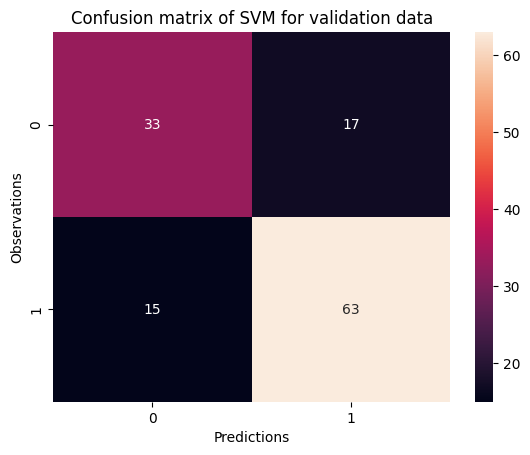

              precision    recall  f1-score   support

         0.0       0.69      0.66      0.67        50
         1.0       0.79      0.81      0.80        78

    accuracy                           0.75       128
   macro avg       0.74      0.73      0.74       128
weighted avg       0.75      0.75      0.75       128



In [63]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of SVM for validation data') 
plt.xlabel('Predictions')
plt.ylabel('Observations')
plt.show()
print(classification_report(y_test,y_pred_svm))

In [64]:
recall_score(y_test, y_pred_svm, pos_label=0)

0.66

In [65]:
mcc = matthews_corrcoef(y_test, y_pred_svm)
print("MCC value:", mcc)

MCC value: 0.4713319914389921


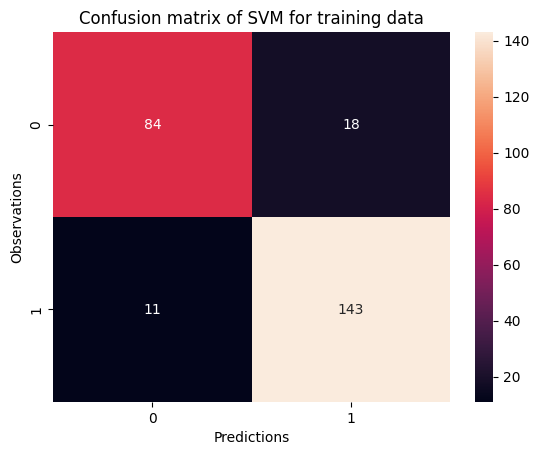

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       102
         1.0       0.89      0.93      0.91       154

    accuracy                           0.89       256
   macro avg       0.89      0.88      0.88       256
weighted avg       0.89      0.89      0.89       256



In [66]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_train,y_pred_train_svm)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of SVM for training data') 
plt.xlabel('Predictions')
plt.ylabel('Observations')
plt.show()
print(classification_report(y_train,y_pred_train_svm))


In [67]:
recall_score(y_train, y_pred_train_svm, pos_label=0)

0.8235294117647058

In [68]:
mcc = matthews_corrcoef(y_train, y_pred_train_svm)
print("MCC value:", mcc)

MCC value: 0.7621874255324755


KNN

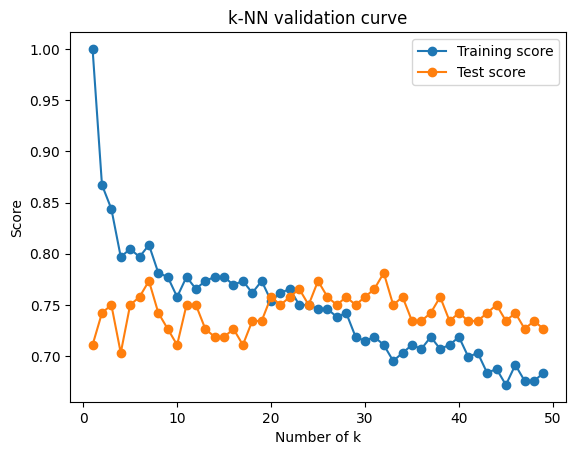

Optimal number of k: 32


In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


# List of different k values to test
k_values = list(range(1, 50))

# Initialize lists to store results
train_scores = []
test_scores = []

# Calculation of results for different values of k
for k in k_values:
    # Initialization of k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Training the classifier
    knn.fit(x_train, y_train)
    
    # Calculation of scores for training and test set
    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    
    # Adding scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plotting the validation curve
plt.figure()
plt.plot(k_values, train_scores, label='Training score', marker='o')
plt.plot(k_values, test_scores, label='Test score', marker='o')
plt.xlabel('Number of k')
plt.ylabel('Score')
plt.title('k-NN validation curve')
plt.legend()
plt.show()

# Selection of optimal value of k based on test results
optimal_k = k_values[np.argmax(test_scores)]
print("Optimal number of k:", optimal_k)

In [70]:
print('The optimal number of k nearest neighbors is:', optimal_k)
##From the graph, we can read the optimal value of k, 
#which corresponds to the highest test result. We use the function np.argmax(test_scores), 
# which returns the index of the maximum value in test_scores. We choose the value of k that corresponds to this index

The optimal number of k nearest neighbors is: 32


In [71]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
y_pred_train_knn = knn.predict(x_train)

In [72]:
model = KNeighborsClassifier()
# Define a grid of parameters to search.
param_grid = {
'n_neighbors': [1,2,3,4,5,8,10,12,14,16,18,20,22,25,28,30,32,34,36,38,40,42,44,446,48,50],
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan'],
}
# Initialize the GridSearchCV object.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

# Train the model on the training data.
grid_search.fit(x_train, y_train)

# Finding the optimal parameters.
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Evaluate model performance on test data.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


C:\Users\Michał\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [0.68769231 0.68769231 0.63276923 0.68769231 0.68769231 0.71446154
 0.70323077 0.71076923 0.67969231 0.71446154 0.71184615 0.70307692
 0.71169231 0.71061538 0.71169231 0.70676923 0.72738462 0.71092308
 0.71569231 0.71523077 0.71584615 0.71907692 0.69261538 0.70738462
 0.68830769 0.71123077 0.67261538 0.69138462 0.66123077 0.67615385
 0.66107692 0.66815385 0.65692308 0.66415385 0.64138462 0.672
 0.65338462 0.68353846 0.64153846 0.67584615 0.62953846 0.676
 0.64923077 0.67969231 0.63369231 0.67184615        nan        nan
 0.62184615 0.66015385 0.62553846 0.65615385 0.70338462 0.70338462
 0.62553846 0.70338462 0.69969231 0.71861538 0.69923077 0.71492308
 0.71538462 0.73415385 0.69569231 0.69507692 0.72707692 0.70276923
 0.71153846 0.71461538 0.71938462 0.70307692 0.71184615 0.70707692
 0.69646154 0.70323077 0.67292308 0.69153846

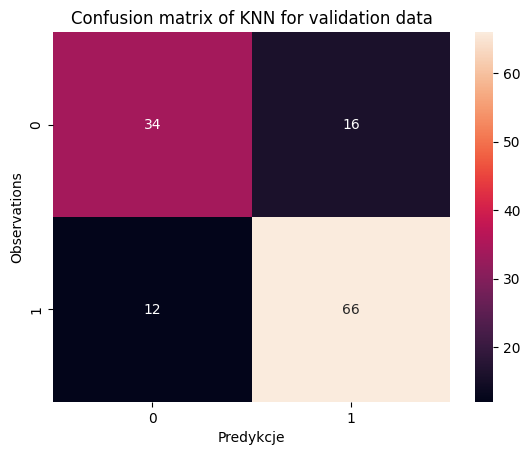

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71        50
         1.0       0.80      0.85      0.83        78

    accuracy                           0.78       128
   macro avg       0.77      0.76      0.77       128
weighted avg       0.78      0.78      0.78       128



In [73]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of KNN for validation data') 
plt.xlabel('Predykcje')
plt.ylabel('Observations')
plt.show()
print(classification_report(y_test,y_pred_knn))

In [74]:
recall_score(y_test, y_pred_knn, pos_label=0)

0.68

In [75]:
mcc = matthews_corrcoef(y_test, y_pred_knn)
print("MCC value:", mcc)

MCC value: 0.5350066877778675


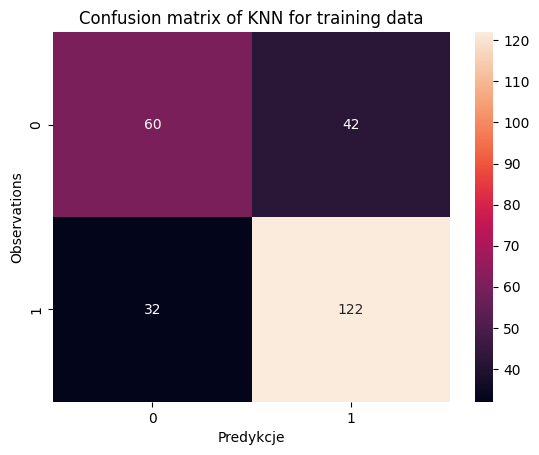

              precision    recall  f1-score   support

         0.0       0.65      0.59      0.62       102
         1.0       0.74      0.79      0.77       154

    accuracy                           0.71       256
   macro avg       0.70      0.69      0.69       256
weighted avg       0.71      0.71      0.71       256



In [76]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_train,y_pred_train_knn)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of KNN for training data') 
plt.xlabel('Predykcje')
plt.ylabel('Observations')
plt.show()
print(classification_report(y_train,y_pred_train_knn))

In [77]:
recall_score(y_train, y_pred_train_knn, pos_label=0)

0.5882352941176471

In [78]:
mcc = matthews_corrcoef(y_train, y_pred_train_knn)
print("MCC value:", mcc)

MCC value: 0.38818102710104363


RANDOM FOREST

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz


In [80]:
rf = RandomForestClassifier(max_depth= 7, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 300,random_state=1)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
y_pred_train_rf = rf.predict(x_train)

In [81]:
model = RandomForestClassifier()
# Define the grid of parameters to be searched
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 6,7,8,9,10],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2,3, 5,7,9,10]
}
# Initialization of the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

# Train the model on the training data
grid_search.fit(x_train, y_train)

# Finding the optimal parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Evaluate model performance on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

Best parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


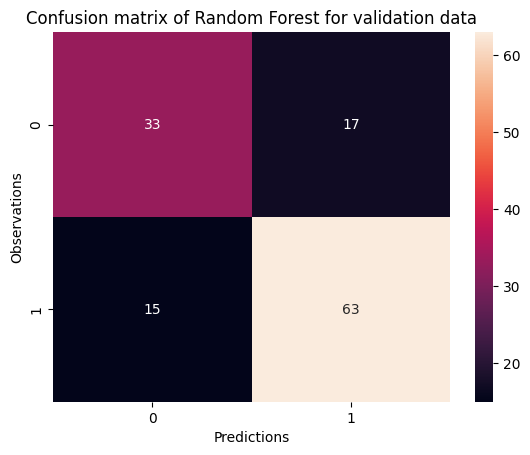

              precision    recall  f1-score   support

         0.0       0.69      0.66      0.67        50
         1.0       0.79      0.81      0.80        78

    accuracy                           0.75       128
   macro avg       0.74      0.73      0.74       128
weighted avg       0.75      0.75      0.75       128



In [82]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of Random Forest for validation data') 
plt.xlabel('Predictions')
plt.ylabel('Observations')
plt.show()
print(classification_report(y_test,y_pred_rf))

In [83]:
recall_score(y_test, y_pred_rf, pos_label=0)

0.66

In [84]:
mcc = matthews_corrcoef(y_test, y_pred_rf)
print("MCC value:", mcc)

MCC value: 0.4713319914389921


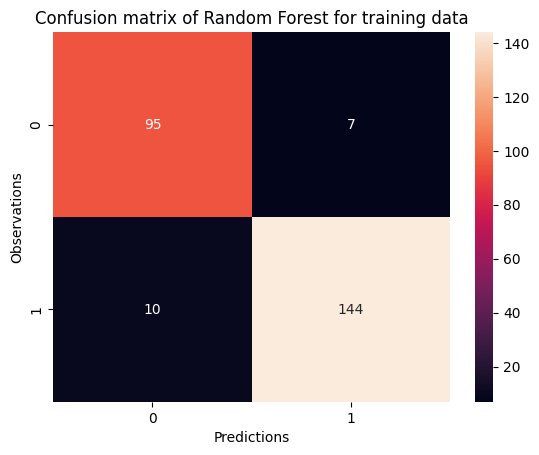

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92       102
         1.0       0.95      0.94      0.94       154

    accuracy                           0.93       256
   macro avg       0.93      0.93      0.93       256
weighted avg       0.93      0.93      0.93       256



In [85]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_train,y_pred_train_rf)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of Random Forest for training data') 
plt.xlabel('Predictions')
plt.ylabel('Observations')
plt.show()
print(classification_report(y_train,y_pred_train_rf))

In [86]:
recall_score(y_train, y_pred_train_rf, pos_label=0)

0.9313725490196079

In [87]:
mcc = matthews_corrcoef(y_train, y_pred_train_rf)
print("MCC value:", mcc)

MCC value: 0.8624115330711053


Data with predictions

In [88]:
main_data = data[['Chemical Name', 'Set*', 'Acute Toxicity Class [Observed]','MW','LUMO', 'Mv', 'Hy', 'MLOGP','SAacc']]

In [89]:
# Dodawanie predykcji dla danych treningowych
main_data.loc[main_data['Set*'] == 'T', 'knn_predict'] = y_pred_train_knn
main_data.loc[main_data['Set*'] == 'T', 'svm_predict'] = y_pred_train_svm
main_data.loc[main_data['Set*'] == 'T', 'rf_predict'] = y_pred_train_rf

# Dodawanie predykcji dla danych testowych
main_data.loc[main_data['Set*'] == 'V', 'knn_predict'] = y_pred_knn
main_data.loc[main_data['Set*'] == 'V', 'svm_predict'] = y_pred_svm
main_data.loc[main_data['Set*'] == 'V', 'rf_predict'] = y_pred_rf


C:\Users\Michał\AppData\Local\Temp\ipykernel_4172\2418271303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data.loc[main_data['Set*'] == 'T', 'knn_predict'] = y_pred_train_knn
C:\Users\Michał\AppData\Local\Temp\ipykernel_4172\2418271303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data.loc[main_data['Set*'] == 'T', 'svm_predict'] = y_pred_train_svm
C:\Users\Michał\AppData\Local\Temp\ipykernel_4172\2418271303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [90]:
main_data

,Chemical Name,Set*,Acute Toxicity Class [Observed],MW,LUMO,Mv,Hy,MLOGP,SAacc,knn_predict,svm_predict,rf_predict
0,Carbon tetrachloride,T,1.0,153.8230,-1.394,1.072720,-0.179649,2.226401,0.000000,1.0,1.0,1.0
1,Benzyltriethylammonium chloride,T,0.0,227.7765,-0.899,0.543133,-0.904914,-0.294418,0.000000,1.0,0.0,0.0
2,"2,3,4,6-Tetrachlorophenol",T,1.0,231.8932,-1.302,0.892708,0.056889,3.617261,42.683343,1.0,1.0,1.0
3,Ethylenediaminetetraacetic acid,T,0.0,292.2450,-0.074,0.595800,2.173950,-1.358423,277.561709,0.0,0.0,0.0
4,"Aniline, p-(phenylazo)-",T,1.0,197.2390,-0.916,0.660438,0.430914,2.678616,66.223202,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380,Dodecylbenzenesulfonic acid,V,1.0,326.4932,-0.623,0.562183,-0.354405,5.320907,87.267778,1.0,1.0,1.0
381,Dibromocresyl glycidyl ether,V,1.0,321.9958,-0.430,0.693367,-0.696088,2.920793,21.999776,1.0,1.0,1.0
382,"2-Chloro-2',6'-diethyl-N-(2-propoxyethyl)aceta...",V,1.0,311.8509,-0.187,0.577168,-0.797341,3.506542,39.269129,1.0,1.0,1.0
383,"cis-1,4-Dibenzyloxy-2-butene",V,1.0,268.3548,0.307,0.617440,-0.885577,3.420105,21.999776,1.0,1.0,1.0


In [91]:
#Save data with predictions to excel file
main_data.to_excel('data_with_predictions.xlsx', index=False)